# script for additional figures - Africa gas briefing

In [18]:
import matplotlib.pyplot as mp
import matplotlib
import pygsheets
import numpy
import pandas
import squarify
import seaborn
import itertools

In [19]:
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1SHvt4dl6ErgGY9p2FJ4wHNVsRtoRKK_CxrB4VUdNPXA')

In [20]:
table3_df = spreadsheet.worksheet('title', 'FINAL - Fig 2 (orig - Table 3_)').get_as_df()
table14_df = spreadsheet.worksheet('title', 'FINAL - Fig 8 (orig - Table 14)').get_as_df()

/Users/baird/miniconda3/envs/gem/lib/python3.9/site-packages/pygsheets/worksheet.py:1477: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


In [4]:
table3_df

,Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Pipeline exports to Europe (bcm),34.4,38.5,33.3,29.1,29.8,38.7,37.2,37.3,26.5,25.2,37.2
1,Pipeline exports to the Middle East (bcm),1.6,0.8,1.1,0.3,0.3,,,0.1,1.2,0.4,0.7
2,LNG exports (bcm),56.4,54.2,47.0,49.5,48.5,46.2,55.7,53.5,61.6,56.0,58.5
3,Total exports (bcm),92.4,93.5,81.4,78.8,78.6,84.9,92.9,90.9,89.4,81.7,96.4


In [5]:
table3_df_clean = table3_df.replace('',0)
table3_df_clean.set_index('Year', inplace=True)
table3_df_clean.index.name = None
# get rid of 'Total exports (bcm)' row
table3_df_clean.drop('Total exports (bcm)', inplace=True)
table3_df_clean.sort_values(2021, ascending=False, inplace=True)

In [6]:
table3_df_clean

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
LNG exports (bcm),56.4,54.2,47.0,49.5,48.5,46.2,55.7,53.5,61.6,56.0,58.5
Pipeline exports to Europe (bcm),34.4,38.5,33.3,29.1,29.8,38.7,37.2,37.3,26.5,25.2,37.2
Pipeline exports to the Middle East (bcm),1.6,0.8,1.1,0.3,0.3,0.0,0.0,0.1,1.2,0.4,0.7


In [7]:
table3_df_cumsum = table3_df_clean.cumsum()

# Fig 2 in report

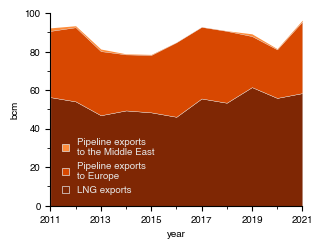

In [103]:
# fill up new capacities as they come online
start_year = 2011
end_year = 2021
year_list = range(start_year, end_year+1, 1)

font_size = 7
fig = mp.figure(figsize=(3.25,2.5))
#fig = mp.figure(figsize=(3.25,4))

ax = fig.add_subplot(111)
ax.set_xlim(start_year, end_year)
ax.set_ylim(0,100)

sel_cmap = matplotlib.cm.get_cmap('Oranges')#cm.get_cmap('magma')
export_colors = [sel_cmap(i) for i in numpy.linspace(1,0.5,table3_df_clean.index.size)]
index_list = ['LNG exports (bcm)',
              'Pipeline exports to Europe (bcm)',
              'Pipeline exports to the Middle East (bcm)']
label_list = ['LNG exports',
              'Pipeline exports\nto Europe',
              'Pipeline exports\nto the Middle East']

ax.fill_between(year_list, 
                0, 
                table3_df_cumsum.loc[index_list[0]],
                color=export_colors[0], 
                label=label_list[0],
                edgecolor='0.9',
                linewidth=0.25, zorder=0)

ax.fill_between(year_list, 
                table3_df_cumsum.loc[index_list[0]],
                table3_df_cumsum.loc[index_list[1]],
                color=export_colors[1], 
                label=label_list[1],
                edgecolor='0.9',
                linewidth=0.25,
                zorder=1)

ax.fill_between(year_list, 
                table3_df_cumsum.loc[index_list[1]],
                table3_df_cumsum.loc[index_list[2]],
                color=export_colors[2], 
                label=label_list[2], linewidth=0, zorder=0)

# ax.plot(year_list,
#         table3_df_cumsum.loc[index_list[1]],
#         color='1',
#         lw=0.25)

# ax.plot(year_list,
#         table3_df_cumsum.loc[index_list[0]],
#         color='1',
#         lw=0.25)

ax.tick_params(labelsize=font_size)
ax.set_ylabel('bcm', size=font_size)
ax.set_xlabel('year', size=font_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax_h, ax_l = ax.get_legend_handles_labels()
outline_handles = [matplotlib.patches.Patch(facecolor=color, edgecolor='0.9', linewidth=0.5, label=label) for color, label in zip(export_colors, label_list)]
ax.legend(#ax_h[::-1],
          outline_handles[::-1],
          ax_l[::-1],
          fontsize=font_size, frameon=False, labelcolor='0.9',
          handlelength=0.73, loc='lower left', bbox_to_anchor=(.01,0.01))

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.xaxis.set_ticks(year_list[0::2])
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

mp.savefig('saved-figures/exports_timeseries-fig2.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/exports_timeseries-fig2.pdf', bbox_inches='tight', transparent=True)
mp.savefig('saved-figures/exports_timeseries-fig2.svg', bbox_inches='tight', transparent=True)

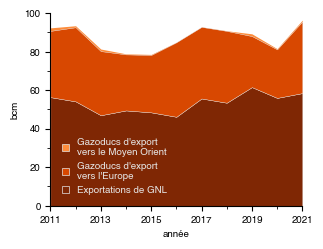

In [104]:
# fill up new capacities as they come online
start_year = 2011
end_year = 2021
year_list = range(start_year, end_year+1, 1)

font_size = 7
fig = mp.figure(figsize=(3.25,2.5))
#fig = mp.figure(figsize=(3.25,4))

ax = fig.add_subplot(111)
ax.set_xlim(start_year, end_year)
ax.set_ylim(0,100)

sel_cmap = matplotlib.cm.get_cmap('Oranges')#cm.get_cmap('magma')
export_colors = [sel_cmap(i) for i in numpy.linspace(1,0.5,table3_df_clean.index.size)]
index_list = ['LNG exports (bcm)',
              'Pipeline exports to Europe (bcm)',
              'Pipeline exports to the Middle East (bcm)']
# label_list = ['LNG exports',
#               'Pipeline exports\nto Europe',
#               'Pipeline exports\nto the Middle East']


label_list = ["Exportations de GNL",
              "Gazoducs d'export\nvers l'Europe",
              "Gazoducs d'export\nvers le Moyen Orient"]


ax.fill_between(year_list, 
                0, 
                table3_df_cumsum.loc[index_list[0]],
                color=export_colors[0], 
                label=label_list[0],
                edgecolor='0.9',
                linewidth=0.25, zorder=0)

ax.fill_between(year_list, 
                table3_df_cumsum.loc[index_list[0]],
                table3_df_cumsum.loc[index_list[1]],
                color=export_colors[1], 
                label=label_list[1],
                edgecolor='0.9',
                linewidth=0.25, zorder=1)

ax.fill_between(year_list, 
                table3_df_cumsum.loc[index_list[1]],
                table3_df_cumsum.loc[index_list[2]],
                color=export_colors[2], 
                label=label_list[2], linewidth=0, zorder=0)

# ax.plot(year_list,
#         table3_df_cumsum.loc[index_list[1]],
#         color='1',
#         lw=0.25)

# ax.plot(year_list,
#         table3_df_cumsum.loc[index_list[0]],
#         color='1',
#         lw=0.25)

ax.tick_params(labelsize=font_size)
ax.set_ylabel('bcm', size=font_size)
ax.set_xlabel('année', size=font_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax_h, ax_l = ax.get_legend_handles_labels()
outline_handles = [matplotlib.patches.Patch(facecolor=color, edgecolor='0.9', linewidth=0.5, label=label) for color, label in zip(export_colors, label_list)]
ax.legend(#ax_h[::-1],
          outline_handles[::-1],
          ax_l[::-1],
          fontsize=font_size, frameon=False, labelcolor='0.9',
          handlelength=0.73, loc='lower left', bbox_to_anchor=(.01,0.01),
        )

#plt.axes.yaxis.set_zorder(level=11)
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.xaxis.set_ticks(year_list[0::2])
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

mp.savefig('saved-figures/exports_timeseries-fig2-Fr.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/exports_timeseries-fig2-Fr.pdf', bbox_inches='tight', transparent=True)
mp.savefig('saved-figures/exports_timeseries-fig2-Fr.svg', bbox_inches='tight', transparent=True)

# plot table 14 (Fig 10 in report)

In [49]:
sel_cmap = matplotlib.cm.get_cmap('Oranges')
costs_prop = sel_cmap(1.0)#tracker_operating
costs_con = sel_cmap(0.75)#tracker_construction

In [50]:
table14_df

,,Gas plants,Pipelines,LNG Import terminals,LNG Export terminals
0,Proposed,44.5,84.5,7.7,87.1
1,Construction,8.3,4.3,0.4,8.0
2,Total,52.8,88.8,8.0,95.1


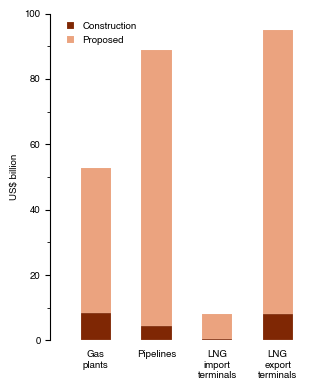

In [21]:
font_size = 7
ytop = 100
set_width=0.5

use_this_df = table14_df.set_index('')#.drop('Total')
labels_formatted = ['Gas\nplants',
                    'Pipelines',
                    'LNG\nimport\nterminals',
                    'LNG\nexport\nterminals']

fig = mp.figure(figsize=(3.25,4))

ax = fig.add_subplot(111)

ax.bar(use_this_df.columns, use_this_df.loc['Construction'],
       color=costs_prop, label='Construction', width=set_width, edgecolor='1', linewidth=0.1)
ax.bar(use_this_df.columns, use_this_df.loc['Proposed'],
       color=costs_con, label='Proposed',
      bottom=use_this_df.loc['Construction'], width=set_width, edgecolor='1', linewidth=0.1, alpha=0.5)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, bbox_to_anchor=(-0.05,1), loc='upper left')#, bbox_to_anchor=(0.64,0.5), loc='center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_position(('data', -.75))
ax.tick_params(labelsize=font_size, bottom=False)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(labels_formatted, ha='center', va='top')
ax.set_ylabel('US$ billion', size=font_size)

ax.set_ylim(0, ytop)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

mp.tight_layout()
# ax.set_title('regional import capacity', fontsize=font_size)

mp.savefig('saved-figures/all-capex-fig10.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/all-capex-fig10.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/all-capex-fig10.svg',
          bbox_inches='tight', 
          transparent=True)

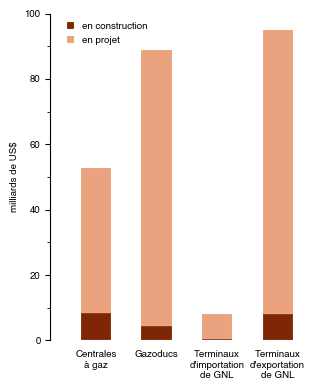

In [26]:
font_size = 7
ytop = 100
set_width=0.5

use_this_df = table14_df.set_index('').drop('Total')
# labels_formatted = ['Gas\nplants',
#                     'Pipelines',
#                     'LNG\nimport\nterminals',
#                     'LNG\nexport\nterminals']
labels_formatted = [
"Centrales\nà gaz",
"Gazoducs",
"Terminaux\nd'importation\nde GNL",
"Terminaux\nd'exportation\nde GNL"]

fig = mp.figure(figsize=(3.25,4))

ax = fig.add_subplot(111)

ax.bar(use_this_df.columns, use_this_df.loc['Construction'],
       color=costs_prop, label='en construction', width=set_width, edgecolor='1', linewidth=0.1)
ax.bar(use_this_df.columns, use_this_df.loc['Proposed'],
       color=costs_con, label='en projet',
      bottom=use_this_df.loc['Construction'], width=set_width, edgecolor='1', linewidth=0.1, alpha=0.5)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, bbox_to_anchor=(-0.05,1), loc='upper left')#, bbox_to_anchor=(0.64,0.5), loc='center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_position(('data', -.75))
ax.tick_params(labelsize=font_size, bottom=False)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(labels_formatted, ha='center', va='top')
ax.set_ylabel('milliards de US$', size=font_size)

ax.set_ylim(0, ytop)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

mp.tight_layout()
# ax.set_title('regional import capacity', fontsize=font_size)

mp.savefig('saved-figures/all-capex-fig10-Fr.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/all-capex-fig10-Fr.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/all-capex-fig10-Fr.svg',
          bbox_inches='tight', 
          transparent=True)

In [27]:
single_bar_order = ['Gas plants','Pipelines','LNG Export terminals', 'LNG Import terminals']

0
1
2
3
4
5
6
7


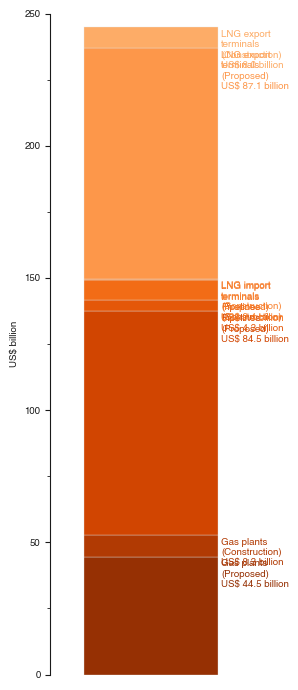

In [28]:
font_size = 7
ytop = 250
set_width = 0.1

sel_cmap = matplotlib.cm.get_cmap('Oranges_r')
use_this_df = table14_df.set_index('').drop('Total')
labels_formatted = ['Gas plants',
                    'Pipelines',
                    'LNG import\nterminals',
                    'LNG export\nterminals']

fig = mp.figure(figsize=(3.25,7))

ax = fig.add_subplot(111)

for col_idx in range(4):
    for row_idx in range(2):
        print(col_idx*2+row_idx)
        color_to_use = sel_cmap((col_idx*2+1+row_idx)/(use_this_df.size+5))
        ax.bar(0, use_this_df.iloc[row_idx,col_idx],
               color=color_to_use,  
               bottom=use_this_df.values.transpose().flatten()[:col_idx*2+row_idx].sum(),
               width=set_width, edgecolor='0.9', linewidth=0.25)
        
        label_text = labels_formatted[col_idx]+'\n('+use_this_df.index[row_idx]+')\n'+\
                    'US$ '+str(use_this_df.iloc[row_idx,col_idx])+' billion'
        ax.text(s=label_text,
                x=0.52*set_width,
                y=use_this_df.values.transpose().flatten()[:col_idx*2+1+row_idx].sum()-1,
                fontsize=font_size, ha='left', va='top', color=color_to_use)

#ax_l,ax_h = ax.get_legend_handles_labels()
#ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, loc=5)

yaxis_color = '0.1'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_position(('data', -0.75*set_width))

ax.spines['left'].set_color(yaxis_color)
#ax.spines['left'].set_linewidth(2)
ax.yaxis.label.set_color(yaxis_color)
ax.tick_params(labelsize=font_size, bottom=False)
ax.tick_params(axis='y', which='both', colors=yaxis_color)
ax.set_ylabel('US$ billion', size=font_size, color=yaxis_color)

ax.xaxis.set_ticklabels([])
ax.set_ylim(0, ytop)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
# ax.set_title('regional import capacity', fontsize=font_size)

mp.savefig('saved-figures/table14-alt.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/table14-alt.pdf',
          bbox_inches='tight', 
          transparent=True)

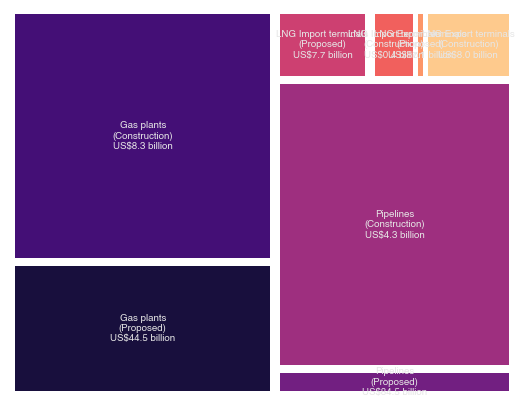

In [29]:
fig = mp.figure(figsize=(6.5,5))
ax = fig.add_subplot(111)

labels = [j[0]+'\nUS$'+str(j[1])+' billion' for j in 
          list(zip([i[0]+'\n('+i[1]+')' for i in list(itertools.product(use_this_df.columns.tolist(), use_this_df.index.tolist()))],
                   use_this_df.values.transpose().flatten()
                  )
              )
         ]
squarify.plot(sizes=use_this_df.values.flatten(),
              color=seaborn.color_palette("magma", len(use_this_df.values.flatten())),
              ax=ax, 
              pad=0.05,
              label=labels,
              text_kwargs={'fontsize':font_size,'color':'0.9'})

ax.axis('off')

mp.savefig('saved-figures/table14-alt2.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/table14-alt2.pdf',
          bbox_inches='tight', 
          transparent=True)

# gas plants figures

In [30]:
table6_df = spreadsheet.worksheet('title', 'FINAL - Table 6 (orig - Table 12)').get_as_df()

In [31]:
use_this_df

,Gas plants,Pipelines,LNG Import terminals,LNG Export terminals
,,,,
Proposed,44.5,84.5,7.7,87.1
Construction,8.3,4.3,0.4,8.0


In [32]:
gasplants_con = sel_cmap(0)
gasplants_precon = sel_cmap(0.25)
gasplants_ann = sel_cmap(0.5)

# figure 8

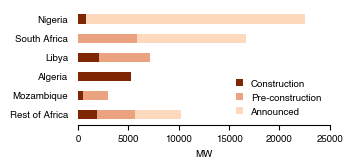

In [33]:
font_size = 7
set_width = 0.5
use_this_df = table6_df.set_index('Country').drop('Total').replace('',0).sort_values('In Development (Announced + Pre-construction + Construction)')
rest_df = use_this_df.loc[['Rest of Africa']]
use_this_df = pandas.concat([rest_df, use_this_df.drop('Rest of Africa')])
ytop = use_this_df.index.size

fig = mp.figure(figsize=(3.25,1.5))
ax = fig.add_subplot(111)

ax.barh(range(use_this_df.index.size), use_this_df['Construction'],
       color=gasplants_con, label='Construction', height=set_width)

ax.barh(range(use_this_df.index.size), use_this_df['Pre-construction'],
       color=gasplants_precon, label='Pre-construction',
      left=use_this_df['Construction'], height=set_width, alpha=0.5)
ax.barh(range(use_this_df.index.size), use_this_df['Announced'],
       color=gasplants_ann, label='Announced',
      left=use_this_df[['Construction','Pre-construction']].sum(axis=1), height=set_width, alpha=0.333)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, loc=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelsize=font_size,
              left=False)
ax.set_xlabel('MW', size=font_size)

ax.yaxis.set_ticks(range(use_this_df.index.size))
ax.yaxis.set_ticklabels(use_this_df.index, size=font_size, va='center')
#ax.set_ylim(ybot,ytop)
ax.set_xlim(0, 25000)
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

# ax.set_title('Regional Export Capacity', fontsize=font_size)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8.svg',
          bbox_inches='tight', 
          transparent=True)

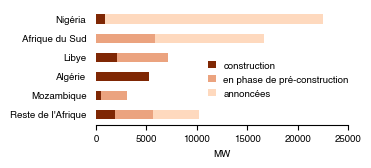

In [43]:
font_size = 7
set_width = 0.5
use_this_df = table6_df.set_index('Country').drop('Total').replace('',0).sort_values('In Development (Announced + Pre-construction + Construction)')
rest_df = use_this_df.loc[['Rest of Africa']]
use_this_df = pandas.concat([rest_df, use_this_df.drop('Rest of Africa')])
ytop = use_this_df.index.size

fig = mp.figure(figsize=(3.25,1.5))
ax = fig.add_subplot(111)

ax.barh(range(use_this_df.index.size), use_this_df['Construction'],
       color=gasplants_con, label='construction', height=set_width)

ax.barh(range(use_this_df.index.size), use_this_df['Pre-construction'],
       color=gasplants_precon, label='en phase de pré-construction',
      left=use_this_df['Construction'], height=set_width, alpha=0.5)
ax.barh(range(use_this_df.index.size), use_this_df['Announced'],
       color=gasplants_ann, label='annoncées',
      left=use_this_df[['Construction','Pre-construction']].sum(axis=1), height=set_width, alpha=0.333)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, loc=(0.43,0.2))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelsize=font_size,
              left=False)
ax.set_xlabel('MW', size=font_size)

ax.yaxis.set_ticks(range(use_this_df.index.size))
fr_labels = ["Nigéria",
"Afrique du Sud",
"Libye",
"Algérie",
"Mozambique",
"Reste de l'Afrique"][::-1]
ax.yaxis.set_ticklabels(fr_labels, size=font_size, va='center')
#ax.set_ylim(ybot,ytop)
ax.set_xlim(0, 25000)
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

# ax.set_title('Regional Export Capacity', fontsize=font_size)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8-Fr.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8-Fr.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/africa-gas-plants-MW-in-dev-fig8-Fr.svg',
          bbox_inches='tight', 
          transparent=True)

In [44]:
table7_df = spreadsheet.worksheet('title', 'FINAL - Table 7 (orig - Table 13)').get_as_df()

# figure 9

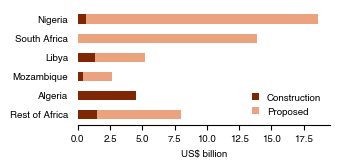

In [45]:
font_size = 7
set_width = 0.5
use_this_df = table7_df.set_index('Country').drop('Total').sort_values('Proposed (US$ billion)')
rest_df = use_this_df.loc[['Rest of Africa']]
use_this_df = pandas.concat([rest_df, use_this_df.drop('Rest of Africa')])
ytop = use_this_df.index.size

fig = mp.figure(figsize=(3.25,1.5))
ax = fig.add_subplot(111)

ax.barh(range(use_this_df.index.size), use_this_df['Construction (US$ billion)'],
       color=costs_prop, label='Construction', height=set_width)

ax.barh(range(use_this_df.index.size), use_this_df['Proposed (US$ billion)'],
       color=costs_con, label='Proposed',
      left=use_this_df['Construction (US$ billion)'], height=set_width, alpha=0.5)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, loc=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelsize=font_size,
              left=False)
ax.set_xlabel('US$ billion', size=font_size)

ax.yaxis.set_ticks(range(use_this_df.index.size))
ax.yaxis.set_ticklabels(use_this_df.index, size=font_size, va='center')
#ax.set_ylim(ybot,ytop)
#ax.set_xlim(0, 25000)
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

# ax.set_title('Regional Export Capacity', fontsize=font_size)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9.svg',
          bbox_inches='tight', 
          transparent=True)

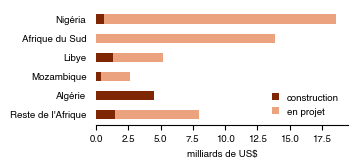

In [48]:
font_size = 7
set_width = 0.5
use_this_df = table7_df.set_index('Country').drop('Total').sort_values('Proposed (US$ billion)')
rest_df = use_this_df.loc[['Rest of Africa']]
use_this_df = pandas.concat([rest_df, use_this_df.drop('Rest of Africa')])
ytop = use_this_df.index.size

fig = mp.figure(figsize=(3.25,1.5))
ax = fig.add_subplot(111)

ax.barh(range(use_this_df.index.size), use_this_df['Construction (US$ billion)'],
       color=costs_prop, label='construction', height=set_width)

ax.barh(range(use_this_df.index.size), use_this_df['Proposed (US$ billion)'],
       color=costs_con, label='en projet',
      left=use_this_df['Construction (US$ billion)'], height=set_width, alpha=0.5)

ax_l,ax_h = ax.get_legend_handles_labels()
ax.legend(ax_h, fontsize=font_size, frameon=False, handlelength=0.75, loc=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelsize=font_size,
              left=False)
ax.set_xlabel('milliards de US$', size=font_size)

ax.yaxis.set_ticks(range(use_this_df.index.size))
fr_labels = ["Nigéria",
"Afrique du Sud",
"Libye",
"Mozambique",
"Algérie",
"Reste de l'Afrique"][::-1]
ax.yaxis.set_ticklabels(fr_labels, size=font_size, va='center')
#ax.set_ylim(ybot,ytop)
#ax.set_xlim(0, 25000)
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

# ax.set_title('Regional Export Capacity', fontsize=font_size)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9-Fr.png',
          bbox_inches='tight', 
          transparent=True,
          dpi=600)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9-Fr.pdf',
          bbox_inches='tight', 
          transparent=True)

mp.savefig('saved-figures/africa-gas-plants-capex-in-dev-fig9-Fr.svg',
          bbox_inches='tight', 
          transparent=True)